## Zomato Bangalore Restaurants

##### Mainly two tasks are carried out on the given dataset:
1. Data Preparation. 
2. Exploratory Data Analysis.

In the end, conclude data analysis with Inferences.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt
import seaborn as sns

#### UDF : show_values_on_bars()

User defined function to display text values in the bar plot.

In [ ]:
def show_values_on_bars(axs, text_color, h_v = 'v', space = 0.4):
    def _show_on_single_plot(ax):
        if h_v == 'v':
            for p in ax.patches:
                
                ht_value = p.get_height()
                
                _x = p.get_x() + p.get_width() / 2 + float(space)
                _y = p.get_y() + ht_value
                ht_value = str(ht_value)
                ax.text(_x, _y, ht_value, ha = 'center', color = text_color) 
                
        elif h_v == 'h':
            for p in ax.patches:
                
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                
                _y = _y - .09
                _x = round(_x / 2)
                ht_value = str(p.get_width())
                ax.text(_x, _y, ht_value, ha = 'center', color = text_color)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [ ]:
# Read data file into a data frame.

zomato_data = pd.read_csv('../input/zomato.csv')

In [ ]:
# Rename columns of the data frame.

zomato_data.rename(index = str, columns = {'approx_cost(for two people)':'approx_cost_for_2',
                                          'listed_in(type)':'listed_in_type', 
                                           'listed_in(city)':'listed_in_city'}, inplace = True)

In [ ]:
# Change case of the values under selective columns to lower case.

for col_name in ['address', 'name', 'online_order', 'book_table', 'location', 'rest_type', 'cuisines', 'listed_in_type', 
            'listed_in_city']:
    zomato_data.loc[:, col_name] = zomato_data[col_name].str.lower()

In [ ]:
# Check for duplicate records.

print('No. of duplicate records in the data set : {}'.format(zomato_data.duplicated().sum()))

In [ ]:
# List number of duplicate values in each column.

var_dupl_rec_dtls = pd.DataFrame({'var_name':zomato_data.columns.tolist(), 'dupl_count':np.linspace(0, 0, zomato_data.shape[1]).tolist()})

for i in (np.arange(var_dupl_rec_dtls.shape[0])):
    var_name = var_dupl_rec_dtls.loc[i, 'var_name']
    var_dupl_rec_dtls.loc[i, 'dupl_count'] = zomato_data[var_name].duplicated().sum()
    
var_dupl_rec_dtls

<b>url</b> variable contains URL of the zomato website page being accessed for a restaurant and is unique for each record in the given data set. The column's data is going to be of least use in our data analysis. Therefore, we will drop this column from the data set.

In [ ]:
# Drop url column from the data frame.

zomato_data.drop(columns = 'url', axis = 1, inplace = True)
zomato_data.reset_index(inplace = True, drop = True)

As per the given data dictionary, <br>
- <b>location</b> : contains name of the locations where the restaurant is situated in different areas of Bengaluru city.
- <b>listed_in_city</b> : is name of the nearby locations for which a restaurant (situated in the nearby area) is listed.

Let's first check whether <b>location</b> and <b>listed_in_city</b> columns store same value or not.

In [ ]:
# Check the percentage of record with same or different values in location and listed_in_city columns.

print('Proportion of records with same values : {}%'.format(round(zomato_data['location'].eq(zomato_data['listed_in_city']).sum() * 100 / zomato_data.shape[0], 2)))
print('Proportion of records with different values : {}%'.format(round(zomato_data['location'].ne(zomato_data['listed_in_city']).sum() * 100 / zomato_data.shape[0], 2)))

It's very clear from the proportions computed above (especially 69%) that the values contained in the columns <b>location</b> and <b>listed_in_city</b> mean different and contain different values.<br> 

Now, let us extract location value from <b>address</b> column and compare it with <b>location</b> and <b>listed_in_city</b> fields.

In [ ]:
location_from_address = pd.Series([list_val[len(list_val) - 2] for list_val in (zomato_data.loc[:, 'address'].str.split(','))]).str.strip(' ')
zomato_data['location_from_address'] = location_from_address

In [ ]:
print('Proportion of records with location and address location not matching : {}%'.\
      format(round(zomato_data['location'].ne(zomato_data['location_from_address']).sum() * 100 / zomato_data.shape[0], 2)))

<b>89.54%</b> of the records have <b>address</b> value containing name of the location that matches <b>location</b> column value of the corresponding record.

In [ ]:
zomato_data.loc[zomato_data['location'].ne(zomato_data['location_from_address']), ['location', 'location_from_address', 'listed_in_city']].head()

Based upon the percentage value computed above i.e. <b>89.54%</b> and by analysing few of these records, it has been found that <b>location</b> values are not matching with the location mentioned in the full address <b>address</b> column for few records due to various reasons. Some of which are mentioned below:<br>
- <b>address</b> field value does not contain name of the locality which can be found in <b>location</b> field.
- Name of the location is found in the <b>address</b> field but the name found in address field does not match with <b>location</b> field values. The names are mis-spelled either in <b>address</b> or <b>location</b> field.
- <b>address</b> field contains <b>landmark</b> of the restaurant instead of the location name.

This endless list of reasons for mismatch between location in <b>address</b> and the <b>location</b> goes on and there is no specific pattern. Also, we do not have any reference or master data to correct these data mismatches. Therefore, let us ignore these data mismatches and drop <b>location_from_address</b> column.

In [ ]:
# Drop listed_in_city column from the data frame.

zomato_data.drop(columns = 'location_from_address', axis = 1, inplace = True)
zomato_data.reset_index(inplace = True, drop = True)

In [ ]:
# Check for duplicate records after dropping "url" column from the data frame.

print('No. of duplicate records in the dataset : {}'.format(zomato_data.duplicated().sum()))

In [ ]:
# Check "name" of these duplicate records.

zomato_data.loc[zomato_data.duplicated(), 'name'].unique()

Let's check out the records for restaurant named "my tea house"

In [ ]:
zomato_data.loc[(zomato_data['name'] == 'my tea house'), ]

<b>Observations</b>

1. We have multiple records for the same restaurant <b>name</b> = "my tea house".
2. <b>listed_in_type</b> is different for each of these records such as cafes, delivery, dine-out.
3. Found multiple records with same <b>listed_in_type</b> for same <b>location</b>.
4. Other fields have same values for the records with same <b>listed_in_type</b> and <b>location</b>.

Let's sort this data on <b>location</b> and <b>listed_in_type</b> fields and double confirm if the records appearing to be duplicate are really duplicate.

Sort **"my tea house"** on **location** and **listed_in_type** columns and check the data.

In [ ]:
zomato_data.loc[(zomato_data['name'] == 'my tea house'), ].sort_values(by = ['location', 'listed_in_type'], axis = 0)

Sort **"nawab di biryani"** on **location** and **listed_in_type** columns and check the data.

In [ ]:
zomato_data.loc[(zomato_data['name'] == 'nawab di biryani'), ].sort_values(by = ['location', 'listed_in_type'], axis = 0)

For the restaurants **"my tea house"** and **"nawab di biryani"**, we have found that:

- Multiple records with same values in all fields of the dataset.
- Multiple records with same values in all fields except <b>listed_in_city</b> field. This could be due to listing of same restaurant (of same location) for different neighboring locations.

We can delete the records with same values in all the fields.<br>

In [ ]:
zomato_data.shape

In [ ]:
# Delete duplicate records from the dataset.

zomato_data.drop(index = zomato_data[zomato_data.duplicated()].index, inplace = True)
zomato_data.reset_index(inplace = True, drop = True)

In [ ]:
zomato_data.shape

Total of <b>44 duplicate records</b> have been deleted from the dataset.

In [ ]:
# Check the data after deleting the duplicate records.

zomato_data.loc[(zomato_data['name'] == 'my tea house'), ].sort_values(by = ['location', 'listed_in_type'], axis = 0)

In [ ]:
zomato_data.loc[(zomato_data['name'] == 'funky punjab'), ].sort_values(by = ['location', 'listed_in_type'], axis = 0)

For the same restaurant <b>name</b> and <b>location</b>:

a. We have multiple records with same/different <b>listed_in_type</b> and/or same/different <b>listed_in_city</b>.<br>
b. <b>reviews_list</b> column value is not same for any combination of any of the fields. Following are some of the combinations I checked reviews_list for:<br>
(i) <b>rest_type</b><br>
(ii) <b>cuisines</b><br>
(iii) <b>listed_in_city + listed_in_type</b><br>
(iv) <b>address + listed_in_city</b><br>
(v) <b>address + rate</b><br>

Therefore, let's consider each record's "reviews_list" as individual review. Parse the ratings from the "reviews_list" of each record and compute average of the ratings. Then, proceed with further analysis.

<b>Variables : rvws_rate_list, avg_cust_rate & no_of_rates</b>

In [ ]:
# Add a column to dataframe to store customer ratings found in reviews_list.

zomato_data.insert(loc = zomato_data.shape[1], column = 'rvws_rate_list', value = '')

# Add a column to dataframe to store average customer ratings found in reviews_list.

zomato_data.insert(loc = zomato_data.shape[1], column = 'avg_cust_rate', value = np.nan)

# Add a column to dataframe to store number of rates found in reviews_list.

zomato_data.insert(loc = zomato_data.shape[1], column = 'no_of_rates', value = np.nan)

In [ ]:
# Pattern to split string on single quote.
pattern_1 = re.compile('\'')

# Pattern to substitute with a blank value.
pattern_2 = re.compile('(Rated\s)+')

# Patter to extract string containg Rated*.
pattern_3 = re.compile('Rated*')

# Loop through the dataset based on dataframe index.
for i in zomato_data.index:
    rvw_str = zomato_data.loc[i, 'reviews_list']
    reviews_str_list = pattern_1.split(rvw_str)

    # Extract ratings from the reviews_list and store them as float values in a list.
    zomato_data.at[i, 'rvws_rate_list'] = [float(pattern_2.sub('', str_val)) for str_val in reviews_str_list if pattern_3.match(str_val)]
    
    # Compute average of ratings found in a review list.
    calc_rate_from_rvwlist = np.mean([float(pattern_2.sub('', str_val)) for str_val in reviews_str_list if pattern_3.match(str_val)])
    calc_rate_from_rvwlist = np.round(calc_rate_from_rvwlist, 1)
    
    # Store average of ratings into avg_cust_rate column.
    zomato_data.at[i, 'avg_cust_rate'] = calc_rate_from_rvwlist
    
    # Store no. of ratings into no_of_rates.
    zomato_data.at[i, 'no_of_rates'] = len(zomato_data.at[i, 'rvws_rate_list'])

In [ ]:
print('% of records with no average customer rate : {}%'.\
      format(round(zomato_data['avg_cust_rate'].isna().sum() * 100 / zomato_data.shape[0], 2)))

<b>Variable : rate</b>

In [ ]:
# Strip "/5" from "rate" field values.

zomato_data.loc[:, 'rate'] = zomato_data['rate'].str.rstrip('/5')

In [ ]:
# Strip one or more spaces from the values.

zomato_data.loc[:, 'rate'] = zomato_data['rate'].str.strip()

In [ ]:
# Check number of records with characters other than alphanumeric in "rate" columns.

zomato_data.loc[zomato_data['rate'].str.contains(r'[^\w\.]', na = False), 'rate'].value_counts()

In [ ]:
# Check if avg_cust_rate contains any character other than alphanumeric.

zomato_data.loc[zomato_data['avg_cust_rate'].astype(str).str.contains(r'[^\w\.]', na = False), 'avg_cust_rate'].unique()

In [ ]:
zomato_data['avg_cust_rate'].value_counts(dropna = False).head()

In [ ]:
zomato_data['rate'].value_counts(dropna = False).head()

In [ ]:
print('No. of records with rate = NEW & avg_cust_rate notna : {}'.\
      format(zomato_data[(zomato_data['rate'] == 'NEW') & (zomato_data['avg_cust_rate'].notna())].shape[0]))

In [ ]:
print('No. of records with rate "-" & avg_cust_rate notna : {}'.\
      format(zomato_data[(zomato_data['rate'] == '-') & (zomato_data['avg_cust_rate'].notna())].shape[0]))

In [ ]:
print('No. of records with rate "-" & avg_cust_rate isna : {}'.\
      format(zomato_data[(zomato_data['rate'] == '-') & (zomato_data['avg_cust_rate'].isna())].shape[0]))

In [ ]:
# Check values of votes field for the records with rate = '-' and avg_cust_rate isna.

zomato_data.loc[(zomato_data['rate'] == '-') & (zomato_data['avg_cust_rate'].isna()), 'votes'].value_counts()

In [ ]:
print('No. of records with rate NaN & avg_cust_rate notna : {}'.\
      format(zomato_data[(zomato_data['rate'].isna()) & (zomato_data['avg_cust_rate'].notna())].shape[0]))

In [ ]:
print('No. of records with rate not-NaN & NEW & avg_cust_rate isna : {}'.\
      format(zomato_data[((zomato_data['rate'].notna()) & (zomato_data['rate'] != 'NEW')) & 
                         (zomato_data['avg_cust_rate'].isna())].shape[0]))

Set <b>NEW</b> and <b>NaNs</b> in: 
- <b>rate</b> with <b>avg_cust_rate</b> not-NaN values. 
- <b>avg_cust_rate</b> NaN values with <b>rate</b> not-NaN values.

In [ ]:
filter_cond = (zomato_data['rate'] == 'NEW') & (zomato_data['avg_cust_rate'].notna())
zomato_data.loc[filter_cond, 'rate'] = zomato_data.loc[filter_cond, 'avg_cust_rate']

In [ ]:
filter_cond = (zomato_data['rate'] == '-') & (zomato_data['avg_cust_rate'].notna())
zomato_data.loc[filter_cond, 'rate'] = zomato_data.loc[filter_cond, 'avg_cust_rate']

In [ ]:
filter_cond = (zomato_data['rate'].isna()) & (zomato_data['avg_cust_rate'].notna())
zomato_data.loc[filter_cond, 'rate'] = zomato_data.loc[filter_cond, 'avg_cust_rate']

In [ ]:
# Set rate and avg_cust_rate to 0 (zero) for the records with votes = 0 with an assumption that these restaurants 
# have been opened recently and not rated/visited by the customers.

filter_cond = ((zomato_data['rate'] == '-') & (zomato_data['avg_cust_rate'].isna()))
zomato_data.loc[filter_cond, 'rate'] = 0
zomato_data.loc[filter_cond, 'avg_cust_rate'] = 0

In [ ]:
filter_cond = ((zomato_data['rate'].notna()) & (zomato_data['rate'] != 'NEW')) & (zomato_data['avg_cust_rate'].isna())
zomato_data.loc[filter_cond, 'avg_cust_rate'] = zomato_data.loc[filter_cond, 'rate'].astype('float64')

In [ ]:
print('No. of records with rate = NEW & avg_cust_rate notna : {}'.\
      format(zomato_data[(zomato_data['rate'] == 'NEW') & (zomato_data['avg_cust_rate'].notna())].shape[0]))

print('No. of records with rate "-" & avg_cust_rate notna : {}'.\
      format(zomato_data[(zomato_data['rate'] == '-') & (zomato_data['avg_cust_rate'].notna())].shape[0]))

print('No. of records with rate NaN & avg_cust_rate notna : {}'.\
      format(zomato_data[(zomato_data['rate'].isna()) & (zomato_data['avg_cust_rate'].notna())].shape[0]))

print('No. of records with rate not-NaN & NEW & avg_cust_rate isna : {}'.\
      format(zomato_data[((zomato_data['rate'].notna()) & (zomato_data['rate'] != 'NEW')) & 
                         (zomato_data['avg_cust_rate'].isna())].shape[0]))

print('No. of records with rate "-" & avg_cust_rate isna : {}'.\
      format(zomato_data[(zomato_data['rate'] == '-') & (zomato_data['avg_cust_rate'].isna())].shape[0]))

In [ ]:
zomato_data.loc[(zomato_data['rate'] == 'NEW') | (zomato_data['rate'].isna()), 'rate'].value_counts(dropna = False)

In [ ]:
zomato_data.loc[zomato_data['avg_cust_rate'].isna(), 'avg_cust_rate'].value_counts(dropna = False)

In [ ]:
zomato_data.loc[((zomato_data['rate'] == 'NEW') | (zomato_data['rate'].isna())) & zomato_data['avg_cust_rate'].isna()].shape[0]

<b>Note:</b> Records with <b>NEW</b> or <b>NaN</b> in <b>rate</b> column have NaN in <b>avg_cust_rate</b> column as well.

<b>Observation:</b><br>
Few more records exist with <b>NEW</b> or <b>NaN</b> in <b>rate</b> and <b>avg_cust_rate</b> columns in spite of above updates.

In [ ]:
zomato_data.loc[(zomato_data['rate'] == 'NEW') | (zomato_data['rate'].isna()), ].\
groupby('votes')['votes'].count()

In [ ]:
zomato_data.loc[zomato_data['avg_cust_rate'].isna(), ].groupby('votes')['votes'].count()

<b>Assumption:</b><br>
Restaurants with votes = 0 have been started recently and are yet to receive customer orders (in turn votes and rating as well) let's set <b>rate</b> and <b>avg_cust_rate</b> to 0 for these restaurants. 

In [ ]:
zomato_data.loc[((zomato_data['rate'] == 'NEW') | (zomato_data['rate'].isna())) & (zomato_data['votes'] == 0), 'rate'] = 0
zomato_data.loc[zomato_data['avg_cust_rate'].isna() & (zomato_data['votes'] == 0), 'avg_cust_rate'] = 0

In [ ]:
zomato_data.loc[(zomato_data['rate'] == 'NEW') | (zomato_data['rate'].isna()), ].\
groupby('votes')['votes'].count()

In [ ]:
zomato_data.loc[zomato_data['avg_cust_rate'].isna(), ].groupby('votes')['votes'].count()

Set <b>rate</b> and <b>avg_cust_rate</b> columns to the <b>median</b> of rate and avg_cust_rate of records for the same restaurant name.

In [ ]:
for rest_name in zomato_data.loc[((zomato_data['rate'] == 'NEW') | (zomato_data['rate'].isna())) & (zomato_data['votes'] != 0), 'name'].unique():
    filter_cond = (zomato_data['name'] == rest_name) & ((zomato_data['rate'] == 'NEW') | (zomato_data['rate'].isna()))
    
    median_value = zomato_data.loc[(zomato_data['name'] == rest_name) & ((zomato_data['rate'] != 'NEW') & (zomato_data['rate'].notna())), 'rate'].astype('float64').agg('median')
    
    zomato_data.loc[filter_cond, 'rate'] = median_value
    zomato_data.loc[filter_cond, 'avg_cust_rate'] = median_value

In [ ]:
# Check no. of records with NEW or NaN in "rate" column.

zomato_data.loc[(zomato_data['rate'] == 'NEW') | (zomato_data['rate'].isna()), ].groupby('votes')['votes'].count()

In [ ]:
# Check no. of records with NaN in "avg_cust_rate" column.

zomato_data.loc[zomato_data['avg_cust_rate'].isna(), ].groupby('votes')['votes'].count()

In [ ]:
# Check if "rate" contains any character other than alphanumeric.

zomato_data.loc[zomato_data['rate'].str.contains(r'[^\w\.]', na = False), 'rate'].unique()

In [ ]:
# Convert "rate" column from int64 to float64.

zomato_data['rate'] = zomato_data['rate'].astype('float64')

In [ ]:
# Check if "approx_cost_for_2" contains any character other than alphanumeric.

zomato_data.loc[zomato_data['approx_cost_for_2'].str.contains(r'[^\w\.]', na = False), 'approx_cost_for_2'].unique()

In [ ]:
# Remove comma character from approx_cost_for_2 column values.

zomato_data['approx_cost_for_2'] = zomato_data['approx_cost_for_2'].str.replace(',', '')

In [ ]:
# Convert approx_cost_for_2 from object to float64.

zomato_data['approx_cost_for_2'] = zomato_data['approx_cost_for_2'].astype('float64')

In [ ]:
# Check % of missing values in each column of the dataset.

round(zomato_data.isna().sum() * 100 / zomato_data.shape[0], 2)

In [ ]:
# Check number of negative values in int64 and/or float64 columns.

[[col_name, zomato_data[col_name].lt(0).sum()] for col_name in \
 zomato_data.select_dtypes(include = ['int64', 'float64']).columns.tolist()]

First let's focus on imputing missing values of variables <b>location</b>, <b>rest_type</b>, <b>cuisines</b> & <b>approx_cost_for_2</b>.

In [ ]:
# Extract 2nd element from end of "address" string and set it as value of "location" column which has missing values.

for i in zomato_data.loc[zomato_data['location'].isna(), 'address'].index:
    address_list = zomato_data.loc[i, 'address'].split(',')
    no_of_ele_list = len(address_list)
    zomato_data.loc[i, 'location'] = address_list[no_of_ele_list - 2].strip()

In [ ]:
# Set missing values in "rest_type" column with mode(rest_type) of the restaurant to which this record belongs.

for i in zomato_data.loc[zomato_data['rest_type'].isna(), ].index:
    rest_name = zomato_data.loc[i, 'name']
    
    mode_of_rest_type = zomato_data.loc[zomato_data['name'] == rest_name, 'rest_type'].mode().tolist()
    
    if isinstance(mode_of_rest_type, list) and mode_of_rest_type:
        mode_of_rest_type = mode_of_rest_type[0]
    
    if mode_of_rest_type:
        zomato_data.loc[i, 'rest_type'] = mode_of_rest_type

In [ ]:
# Set missing values in "cuisines" column with mode(cuisines) of the restaurant to which this record belongs.

for i in zomato_data.loc[zomato_data['cuisines'].isna(), ].index:
    rest_name = zomato_data.loc[i, 'name']
    
    mode_of_cuisines = zomato_data.loc[zomato_data['name'] == rest_name, 'cuisines'].mode().tolist()
    
    if isinstance(mode_of_cuisines, list) and mode_of_cuisines:
        mode_of_cuisines = mode_of_cuisines[0]
    
    if mode_of_cuisines:
        zomato_data.loc[i, 'cuisines'] = mode_of_cuisines

In [ ]:
# Set missing values in "approx_cost_for_2" column with mode(rest_type) of the restaurant to which this record belongs.

for i in zomato_data.loc[zomato_data['approx_cost_for_2'].isna(), ].index:
    rest_name = zomato_data.loc[i, 'name']
    
    mode_of_cost = zomato_data.loc[zomato_data['name'] == rest_name, 'approx_cost_for_2'].median()
    
    if ~np.isnan(mode_of_cost):
        zomato_data.loc[i, 'approx_cost_for_2'] = round(mode_of_cost)

In [ ]:
# Check % of missing values in each column of the dataset.

round(zomato_data.isna().sum() * 100 / zomato_data.shape[0], 2)

After imputing missing values of the variables <b>location</b>, <b>rst_type</b>, <b>cuisines</b> and <b>approx_cost_for_2</b>, we still have some records with missing values in these variables. Let's have a look at other variables with missing values i.e. <b>phone</b> and <b>dish_liked</b>.

In [ ]:
zomato_data.head()

<b>phone</b> variable is not going to help us in finding useful insights in the data. Therefore, let us drop this variable.

In [ ]:
zomato_data.drop(columns = 'phone', axis = 1, inplace = True)

Let us have a closer look at the data now.

In [ ]:
# List the name of restaurants with multiple records in the dataset.

tmp_rest_mult_recs = zomato_data.groupby('name')['name'].count() > 1
tmp_rest_mult_recs.index[tmp_rest_mult_recs == True].tolist()

Let's analyse data for the restaurant named <b>1947</b>

In [ ]:
zomato_data.loc[zomato_data['name'] == '1947', ].sort_values(by = 'location', axis = 0)

<b>Observations on restaurant "1947":</b>
1. This restaurant is situated in 4 locations in Bengaluru city namely <b>Banashankari, Jayanagar, Malleshwaram & Rajajinagar</b>.
2. The restaurant situated in each area have been listed in other areas such as <b>Basavanagudi</b> along with the locality in which it is situated.
3. Every outlet of this restaurant in every area has been listed as separate entry based on the features restaurant have such as Dine-out, Buffet & Delivery. <br>

<b>For e.g.</b> Restaurant situated in <b>Banashankari</b> has been listed for the same locality for two different types: one is for Delivery and the other for Dine-out. Similarly, outlet present in <b>Jayanagar</b> has been listed for it self and for <b>Basavangudi</b> as well for different types Buffet, Delivery and Dine-out.
4. And the votes column values are different for the same restaurant situated in same location and listed in same/different neighbouring location and with different listed_in_type.<br>

<b>For e.g.</b> No. of votes is 2303, 2359 and 2303 are the outlet situated in <b>Jayanagar</b> and listed for <b>Basavanagudi</b> for 3 different types Dine-out, Delivery and Buffet, respectively.
5. Average customer rating is different in some cases based on the locality in which it is being listed and/or the location in which the outlet is situated.<br>

<b>For e.g.</b> Average customer rating is 3.7 for all types for the outlet situated in <b>Rajajinagar</b> and listed for the same locality. However, 3.4, 3.6 and 3.9 are the average customer ratings for the outlet situated in <b>Jayanagar</b> and listed for Basavanagudi for types Buffet, Delivery and Dine-out, respectively.

In [ ]:
# List the records for name = "eat.fit" sorted ascending by "location".

zomato_data.loc[zomato_data['name'] == "eat.fit", ].sort_values(by = 'location', axis = 0)

In [ ]:
# List the records for name = "eat.fit" for "Whitefield" location sorted ascending by "listed_in_city" column.

zomato_data.loc[(zomato_data['name'] == "eat.fit") & (zomato_data['location'] == 'whitefield'), ].sort_values(by = 'listed_in_city', axis = 0)

<b>Observations on restaurant "eat.fit":</b>
1. This restaurant is situated in 4 locations in Bengaluru city namely <b>church street</b>, <b>indiranagar</b>, <b>whitefield</b>, <b>btm</b>, <b>rajajinagar</b>, <b>bellandur</b>, <b>koramangala 5th block</b>, <b>nagawara</b> & <b>electronic city</b>.
2. The restaurant situated in each area have been listed in other areas including the locality in which it is situated.
3. Every outlet of this restaurant in every area has been listed as separate entry based on the features restaurant have such as Dine-out, Buffet & Delivery. <br>

<b>For e.g.</b> Restaurant situated in <b>whitefield</b> has been listed for the same locality for three different types: dine-out, delivery and desserts. Similarly, outlet present in <b>whitefield</b> has been listed for <b>brookefield</b> as well for different types Buffet, Delivery and Dine-out.</pre>

4. And the votes column values are different for the same restaurant situated in same location and listed in same/different neighbouring location and with different listed_in_type.<br>

<b>For e.g.</b> No. of votes is 3.6, 4.4 and 3.4 are for the outlets situated in <b>whitefield</b> and listed for the same location for 3 different types dine-out, delivery and desserts, respectively.

5. Average customer rating is different in some cases based on the locality in which it is being listed and/or the location in which the outlet is situated.<br>

<b>For e.g.</b> Average customer rating is 4.2 and 4.1 for types delivery and desserts for the outlet situated in <b>whitefield</b> and listed for the <b>brookefield</b>.

<b>My overall understanding of the data set is as follows:</b>
1. We have multiple records for the same restaurant due to the fact that the restaurant: <br>
   a. might be present in more than one place in the same locality.<br>
   b. might be present in more than one locality.<br>
   c. might be providing different services such as Dine-out, Delivery, Buffet, .etc.<br>
   d. might be listed for other neighbouring locations.
2. Along with above conditions/scenarios, <b>rates</b>, <b>votes</b>, <b>dishes_liked</b>, <b>cuisines</b>, <b>approx_cost_for_2</b> & <b>avg_cust_rate</b> change.

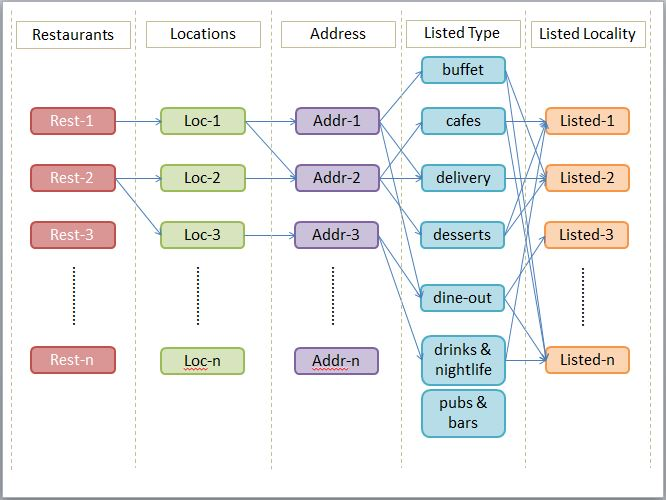

#### Variable : rest_type

In [ ]:
zomato_data.loc[zomato_data['rest_type'].isin(['bakery, dessert parlor', 'dessert parlor, bakery']), 'rest_type'].value_counts()

In [ ]:
zomato_data.loc[zomato_data['rest_type'].isin(['beverage shop, quick bites', 'quick bites, beverage shop']), 'rest_type'].value_counts()

<b>rest_type</b> variable contains same comma separated values but in different order.<br>

<b>For e.g.</b>
- There are <b>147 records</b> with <b>Bakery, Dessert Parlor</b> and <b>85 records</b> with <b>Dessert Parlor, Bakery</b> in <b>rest_type</b> variable.
- There are <b>298 records</b> with <b>Beverage Shop, Quick Bites</b> and <b>101 records</b> with <b>Quick Bites, Beverage Shop</b> in <b>rest_type</b> variable.

Following are the steps we are going to take to fix this problem of order mismatch of <b>rest_type</b> values:
1. Change the case of all values of rest_type column to lower in main data frame.
2. Create a temporary data frame with two columns : <b>rest_type</b> and <b>sorted_rest_type</b>.
3. Load unique values of rest_type column from main data frame into rest_type of temporary data frame.
4. Sort the values of each individual rest_type value of temporary data frame and store the sorted values into sorted_rest_type of the same data frame.
5. Merge temporary data frame with main data frame on rest_type column to map sorted_rest_type column values to rest_type column values in main data frame.
6. Assign sorted_rest_type to rest_type in main data frame and drop sorted_rest_type column.

In [ ]:
# Check number of unique values before changing case of values to lower.

print('No. of unique values present in rest_type column : {}'.format(zomato_data['rest_type'].nunique()))

In [ ]:
# Create a temporary data frame to hold unsorted and sorted values.

tmp_rest_type_df = pd.DataFrame({'rest_type':zomato_data['rest_type'].unique().tolist()})

# Sort the unsorted values and store in "sorted column".

for i in tmp_rest_type_df.index:
    rest_type_list = tmp_rest_type_df.loc[i, 'rest_type']
    
    if rest_type_list == rest_type_list and len(rest_type_list) > 0:
        rest_type_list = tmp_rest_type_df.loc[i, 'rest_type'].split(',')
        rest_type_list = [list_val.strip() for list_val in rest_type_list]
        rest_type_list.sort()
        rest_type_list = ','.join(rest_type_list)
        tmp_rest_type_df.at[i, 'sorted_rest_type'] = rest_type_list

In [ ]:
print('No. of unique values present in sorted column : {}'.format(tmp_rest_type_df['sorted_rest_type'].nunique()))

In [ ]:
# Merge temporary data frame with main data frame mapping unsorted values to sorted values.
zomato_data = zomato_data.merge(tmp_rest_type_df, right_on = 'rest_type', left_on = 'rest_type')

# Copy values from sorted column to rest_type.
zomato_data['rest_type'] = zomato_data['sorted_rest_type'].copy()

In [ ]:
print('No. of unique values present in rest_type column : {}'.format(zomato_data['rest_type'].nunique()))

In [ ]:
# Drop sorted_rest_type column from main data frame.

zomato_data.drop(columns = 'sorted_rest_type', axis = 1, inplace = True)

#### Variable : cuisines

In [ ]:
zomato_data.loc[zomato_data['cuisines'].isin(['north indian, rajasthani', 'rajasthani, north indian']), 'cuisines'].value_counts()

<b>cuisines</b> variable contains same comma separated values but in different order.<br>
<b>For e.g.</b> There are 39 records with "Rajasthani, North Indian" and 24 records with "North Indian, Rajasthani" in cuisines variable.

We are going to re-use the logic which we used to set right similar kind of data problem with <b>rest_type</b> variable.

In [ ]:
# Check number of unique values before changing case of values to lower.

print('No. of unique values present in cuisines column : {}'.format(zomato_data['cuisines'].nunique()))

In [ ]:
# Create a temporary data frame to hold unsorted and sorted values.

tmp_cuisines_df = pd.DataFrame({'cuisines':zomato_data['cuisines'].unique().tolist()})

# Sort the unsorted values and store in another column.

for i in tmp_cuisines_df.index:
    cuisines_list = tmp_cuisines_df.loc[i, 'cuisines']
    
    if cuisines_list == cuisines_list and len(cuisines_list) > 0:
        cuisines_list = tmp_cuisines_df.loc[i, 'cuisines'].split(',')
        cuisines_list = [list_val.strip() for list_val in cuisines_list]
        cuisines_list.sort()
        cuisines_list = ','.join(cuisines_list)
        tmp_cuisines_df.at[i, 'sorted_cuisines'] = cuisines_list

In [ ]:
print('No. of unique values present in sorted column : {}'.format(tmp_cuisines_df['sorted_cuisines'].nunique()))

In [ ]:
# Merge temporary data frame with main data frame mapping unsorted values to sorted values.
zomato_data = zomato_data.merge(tmp_cuisines_df, right_on = 'cuisines', left_on = 'cuisines')

# Copy values from sorted column to cuisines.
zomato_data['cuisines'] = zomato_data['sorted_cuisines'].copy()

In [ ]:
print('No. of unique values present in cuisines column : {}'.format(zomato_data['cuisines'].nunique()))

In [ ]:
# Drop sorted column from main data frame.

zomato_data.drop(columns = 'sorted_cuisines', axis = 1, inplace = True)

We are going to drop below mentioned columns from main data frame, as we do not need these columns anymore for data analysis.<br>
<b>address, dish_liked, reviews_list, menu_item</b>

Since dish_liked column contains <b>more than 50% missing values</b> which is not going help us in any way to analyse the data we can safely drop this column.

In [ ]:
zomato_data.drop(columns = ['dish_liked', 'reviews_list', 'menu_item'], inplace = True)

First, let's check how <b>rate</b>, <b>votes</b> and <b>cost</b> for vary for the restaurants with/without <b>online order</b> and/or <b>book table</b> service.

In [ ]:
oonline_rate = zomato_data.loc[:, ['location', 'name', 'address', 'online_order', 'rate']]
oonline_rate = oonline_rate.drop_duplicates()
oonline_rate.reset_index(inplace = True, drop = True)
oonline_rate = pd.DataFrame(oonline_rate.groupby(['location', 'name', 'address', 'online_order'])['rate'].mean())
oonline_rate.rename(index = str, columns = {'rate':'count'}, inplace = True)
oonline_rate.reset_index(inplace = True)
# oonline_rate
# oonline_rate.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
oonline_votes = zomato_data.loc[:, ['location', 'name', 'address', 'online_order', 'votes']]
oonline_votes = oonline_votes.drop_duplicates()
oonline_votes.reset_index(inplace = True, drop = True)
oonline_votes = pd.DataFrame(oonline_votes.groupby(['location', 'name', 'address', 'online_order'])['votes'].mean())
oonline_votes.rename(index = str, columns = {'votes':'count'}, inplace = True)
oonline_votes.reset_index(inplace = True)
oonline_votes['log_count'] = np.log(oonline_votes['count'] + 1)
# oonline_votes
# oonline_votes.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
oonline_cost = zomato_data.loc[:, ['location', 'name', 'address', 'online_order', 'approx_cost_for_2']]
oonline_cost = oonline_cost.drop_duplicates()
oonline_cost.reset_index(inplace = True, drop = True)
oonline_cost = pd.DataFrame(oonline_cost.groupby(['location', 'name', 'address', 'online_order'])['approx_cost_for_2'].mean())
oonline_cost.rename(index = str, columns = {'approx_cost_for_2':'count'}, inplace = True)
oonline_cost.reset_index(inplace = True)
oonline_cost['log_count'] = np.log(oonline_cost['count'] + 1)
# oonline_cost
# oonline_cost.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
plt.figure(figsize = (15, 5))

plt.suptitle('Order online-wise')

plt.subplot(1, 3, 1)
sns_graph = sns.boxplot(x = 'online_order', y = 'count', data = oonline_rate, order = ['yes', 'no'])
plt.xlabel('Online Order')
plt.ylabel('Rates')
plt.title('Rates')

plt.subplot(1, 3, 2)
sns_graph = sns.boxplot(x = 'online_order', y = 'log_count', data = oonline_votes, order = ['yes', 'no'])
plt.xlabel('Online Order')
plt.ylabel('log(Votes)')
plt.title('Votes')

plt.subplot(1, 3, 3)
sns_graph = sns.boxplot(x = 'online_order', y = 'log_count', data = oonline_cost, order = ['yes', 'no'])
plt.xlabel('Online Order')
plt.ylabel('log(Cost per 2 persons)')
plt.title('Cost per 2 persons')

plt.show()

<b>Observations:</b>

On an average:

- Restaurants that accept online orders have received ratings consistently in the range 3.2 to 3.9 when compared to the restaurants which do not take the orders online. 

- Restaurants that take orders online have received good number of votes when compared to the restaurants that do not take orders online.

- Cost per two persons of the restaurants that take orders online is higher when compared to the restaurants that do not take orders online.

In [ ]:
booktable_rate = zomato_data.loc[:, ['location', 'name', 'address', 'book_table', 'rate']]
booktable_rate = booktable_rate.drop_duplicates()
booktable_rate.reset_index(inplace = True, drop = True)
booktable_rate = pd.DataFrame(booktable_rate.groupby(['location', 'name', 'address', 'book_table'])['rate'].mean())
booktable_rate.rename(index = str, columns = {'rate':'count'}, inplace = True)
booktable_rate.reset_index(inplace = True)
# booktable_rate
# booktable_rate.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
booktable_votes = zomato_data.loc[:, ['location', 'name', 'address', 'book_table', 'votes']]
booktable_votes = booktable_votes.drop_duplicates()
booktable_votes.reset_index(inplace = True, drop = True)
booktable_votes = pd.DataFrame(booktable_votes.groupby(['location', 'name', 'address', 'book_table'])['votes'].mean())
booktable_votes.rename(index = str, columns = {'votes':'count'}, inplace = True)
booktable_votes.reset_index(inplace = True)
booktable_votes['log_count'] = np.log(booktable_votes['count'] + 1)
# booktable_votes
# booktable_votes.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
booktable_cost = zomato_data.loc[:, ['location', 'name', 'address', 'book_table', 'approx_cost_for_2']]
booktable_cost = booktable_cost.drop_duplicates()
booktable_cost.reset_index(inplace = True, drop = True)
booktable_cost = pd.DataFrame(booktable_cost.groupby(['location', 'name', 'address', 'book_table'])['approx_cost_for_2'].mean())
booktable_cost.rename(index = str, columns = {'approx_cost_for_2':'count'}, inplace = True)
booktable_cost.reset_index(inplace = True)
booktable_cost['log_count'] = np.log(booktable_cost['count'] + 1)
# booktable_votes
# booktable_votes.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
plt.figure(figsize = (15, 5))

plt.suptitle('Book table-wise')

plt.subplot(1, 3, 1)
sns_graph = sns.boxplot(x = 'book_table', y = 'count', data = booktable_rate, order = ['yes', 'no'])
plt.xlabel('Book Table')
plt.ylabel('Rates')
plt.title('Rates')

plt.subplot(1, 3, 2)
sns_graph = sns.boxplot(x = 'book_table', y = 'log_count', data = booktable_votes, order = ['yes', 'no'])
plt.xlabel('Book Table')
plt.ylabel('Log (Votes)')
plt.title('Votes')

plt.subplot(1, 3, 3)
sns_graph = sns.boxplot(x = 'book_table', y = 'count', data = booktable_cost, order = ['yes', 'no'])
plt.xlabel('Book Table')
plt.ylabel('Cost per 2 persons')
plt.title('Cost per 2 persons')

plt.show()

- Restaurants with table booking option tends to have consistent ratings in the range <b>3.9 to 4.3</b> which are good ratings and variation in ratings is very less; its between <b>3.4 to 4.8</b>. However, the ratings varies a lot for the restaurants without booking table option which is between <b>2.5 to 5</b> despite of observing maximum rating 5 which is not the case with restaurants which allow table booking.<br>

- Even the no. of votes received by the restaurants with table booking option is more compared to the restaurants which do not have table booking option.

- Range of cost per 2 persons is <b>400 to 1700 rupees</b> for the restaurants with table booking option when compared to restaurants without table booking option which is <b>0 to 800</b>. With cost per 2 persons "with" and "without" table booking option overlapping each other, we may say that the customers with overall budget within 800 will go with restaurants with table booking option. Again, it all depends on the quality and quantity of food that is available with the price range in the restaurants with table booking option compared to one without table booking option.

Customer feedback is the most important and only way through which restaurants are rated and voted by the customer. Restaurants which aim at providing best-of-the-best service to their customer and continue to grow their business take due care in collecting feedback from the customers on regular basis.

In [ ]:
booktable_avgrate = zomato_data.loc[:, ['location', 'name', 'address', 'book_table', 'avg_cust_rate']]
booktable_avgrate = booktable_avgrate.drop_duplicates()
booktable_avgrate.reset_index(inplace = True, drop = True)
booktable_avgrate = pd.DataFrame(booktable_avgrate.groupby(['location', 'name', 'address', 'book_table'])['avg_cust_rate'].mean())
booktable_avgrate.rename(index = str, columns = {'avg_cust_rate':'count'}, inplace = True)
booktable_avgrate.reset_index(inplace = True)
# booktable_avgrate
# booktable_avgrate.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
booktable_ratenum = zomato_data.loc[:, ['location', 'name', 'address', 'book_table', 'no_of_rates']]
booktable_ratenum = booktable_ratenum.drop_duplicates()
booktable_ratenum.reset_index(inplace = True, drop = True)
booktable_ratenum = pd.DataFrame(booktable_ratenum.groupby(['location', 'name', 'address', 'book_table'])['no_of_rates'].sum())
booktable_ratenum.rename(index = str, columns = {'no_of_rates':'count'}, inplace = True)
booktable_ratenum.reset_index(inplace = True)
booktable_ratenum['log_count'] = np.log(booktable_ratenum['count'] + 1)
# booktable_ratenum
# booktable_ratenum.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
plt.figure(figsize = (8, 4))

plt.subplot(1, 2, 1)
sns_graph = sns.boxplot(x = 'book_table', y = 'count', data = booktable_avgrate, order = ['yes', 'no'])
plt.xlabel('Book Table')
plt.ylabel('Avg. Customer Rate')
plt.title('Avg. Customer Rate Book table-wise', fontsize = 'medium')

plt.subplot(1, 2, 2)
sns_graph = sns.boxplot(x = 'book_table', y = 'log_count', data = booktable_ratenum, order = ['yes', 'no'])
plt.xlabel('Book Table')
plt.ylabel('Log (No. of Rates)')
plt.title('No. of Rates Book table-wise', fontsize = 'medium')
plt.show()

<b>Average Customer Rate</b> and <b>No. of Rates</b> are higher for the restaurants with book table option. Though many of the restaurants (with no book table option) have received rates in closer range, range of no. of rates received by restaurants with book table option tops.

In [ ]:
oonline_avgrate = zomato_data.loc[:, ['location', 'name', 'address', 'online_order', 'avg_cust_rate']]
oonline_avgrate = oonline_avgrate.drop_duplicates()
oonline_avgrate.reset_index(inplace = True, drop = True)
oonline_avgrate = pd.DataFrame(oonline_avgrate.groupby(['location', 'name', 'address', 'online_order'])['avg_cust_rate'].mean())
oonline_avgrate.rename(index = str, columns = {'avg_cust_rate':'count'}, inplace = True)
oonline_avgrate.reset_index(inplace = True)
# oonline_avgrate
# oonline_avgrate.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
oonline_ratenum = zomato_data.loc[:, ['location', 'name', 'address', 'online_order', 'no_of_rates']]
oonline_ratenum = oonline_ratenum.drop_duplicates()
oonline_ratenum.reset_index(inplace = True, drop = True)
oonline_ratenum = pd.DataFrame(oonline_ratenum.groupby(['location', 'name', 'address', 'online_order'])['no_of_rates'].sum())
oonline_ratenum.rename(index = str, columns = {'no_of_rates':'count'}, inplace = True)
oonline_ratenum.reset_index(inplace = True)
oonline_ratenum['log_count'] = np.log(oonline_ratenum['count'] + 1)
# oonline_ratenum
# oonline_ratenum.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
plt.figure(figsize = (8, 4))

plt.subplot(1, 2, 1)
sns_graph = sns.boxplot(x = 'online_order', y = 'count', data = oonline_avgrate, order = ['yes', 'no'])
plt.xlabel('Online Order')
plt.ylabel('Avg. Customer Rate')
plt.title('Avg. Customer Rate Online Order-wise', fontsize = 'medium')

plt.subplot(1, 2, 2)
sns_graph = sns.boxplot(x = 'online_order', y = 'log_count', data = oonline_ratenum, order = ['yes', 'no'])
plt.xlabel('Online Order')
plt.ylabel('Log (No. of Rates)')
plt.title('No. of Rates Online Order-wise', fontsize = 'medium')

plt.show()

<b>Average Customer Rate</b> and <b>No. of Rates</b> are higher for the restaurants with Online Order option.

In [ ]:
oonlineyes_bookyes_rate_df = zomato_data.loc[(zomato_data['online_order'] == 'yes') & (zomato_data['book_table'] == 'yes'),
                                       ['location', 'name', 'address', 'rate']]
oonlineyes_bookyes_rate_df = oonlineyes_bookyes_rate_df.drop_duplicates()
oonlineyes_bookyes_rate_df.reset_index(inplace = True, drop = True)
oonlineyes_bookyes_rate_df = pd.DataFrame(oonlineyes_bookyes_rate_df.groupby(['location', 'name', 'address'])['rate'].mean())
oonlineyes_bookyes_rate_df.rename(index = str, columns = {'rate':'aggr_val'}, inplace = True)
oonlineyes_bookyes_rate_df.reset_index(inplace = True)
# oonlineyes_bookyes_rate_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
oonlineno_bookyes_rate_df = zomato_data.loc[(zomato_data['online_order'] == 'no') & (zomato_data['book_table'] == 'yes'),
                                       ['location', 'name', 'address', 'rate']]
oonlineno_bookyes_rate_df = oonlineno_bookyes_rate_df.drop_duplicates()
oonlineno_bookyes_rate_df.reset_index(inplace = True, drop = True)
oonlineno_bookyes_rate_df = pd.DataFrame(oonlineno_bookyes_rate_df.groupby(['location', 'name', 'address'])['rate'].mean())
oonlineno_bookyes_rate_df.rename(index = str, columns = {'rate':'aggr_val'}, inplace = True)
oonlineno_bookyes_rate_df.reset_index(inplace = True)
# oonlineno_bookyes_rate_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
oonlineyes_bookno_rate_df = zomato_data.loc[(zomato_data['online_order'] == 'yes') & (zomato_data['book_table'] == 'no'),
                                       ['location', 'name', 'address', 'rate']]
oonlineyes_bookno_rate_df = oonlineyes_bookno_rate_df.drop_duplicates()
oonlineyes_bookno_rate_df.reset_index(inplace = True, drop = True)
oonlineyes_bookno_rate_df = pd.DataFrame(oonlineyes_bookno_rate_df.groupby(['location', 'name', 'address'])['rate'].mean())
oonlineyes_bookno_rate_df.rename(index = str, columns = {'rate':'aggr_val'}, inplace = True)
oonlineyes_bookno_rate_df.reset_index(inplace = True)
# oonlineyes_bookno_rate_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
oonlineno_bookno_rate_df = zomato_data.loc[(zomato_data['online_order'] == 'no') & (zomato_data['book_table'] == 'no'),
                                       ['location', 'name', 'address', 'rate']]
oonlineno_bookno_rate_df = oonlineno_bookno_rate_df.drop_duplicates()
oonlineno_bookno_rate_df.reset_index(inplace = True, drop = True)
oonlineno_bookno_rate_df = pd.DataFrame(oonlineno_bookno_rate_df.groupby(['location', 'name', 'address'])['rate'].mean())
oonlineno_bookno_rate_df.rename(index = str, columns = {'rate':'aggr_val'}, inplace = True)
oonlineno_bookno_rate_df.reset_index(inplace = True)
# oonlineno_bookno_rate_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
plt.figure(figsize = (11, 9))

plt.suptitle('Rates')

plt.subplot(2, 2, 1)
sns_graph = sns.boxplot(y = 'aggr_val', data = oonlineyes_bookyes_rate_df)
plt.ylabel('Rates')
plt.title('Online Order (Yes) & Book Table (Yes)')

plt.subplot(2, 2, 2)
sns_graph = sns.boxplot(y = 'aggr_val', data = oonlineno_bookyes_rate_df)
plt.ylabel('Rates')
plt.title('Online Order(No) & Book Table (Yes)')

plt.subplot(2, 2, 3)
sns_graph = sns.boxplot(y = 'aggr_val', data = oonlineyes_bookno_rate_df)
plt.ylabel('Rates')
plt.title('Online Order(Yes) & Book Table (No)')

plt.subplot(2, 2, 4)
sns_graph = sns.boxplot(y = 'aggr_val', data = oonlineno_bookno_rate_df)
plt.ylabel('Rates')
plt.title('Online Order(No) & Book Table (No)')

plt.show()

Restaurants that allow their customers to book table irrespective of whether restaurants take orders online or not have received very good ratings from their customers. And the reason for this could be the utmost care taken by these restaurants in <b>understanding and serving the needs of the customers and gathering customer feedbacks<b>.

In [ ]:
oonlineyes_bookyes_votes_df = zomato_data.loc[(zomato_data['online_order'] == 'yes') & (zomato_data['book_table'] == 'yes'),
                                       ['location', 'name', 'address', 'votes']]
oonlineyes_bookyes_votes_df = oonlineyes_bookyes_votes_df.drop_duplicates()
oonlineyes_bookyes_votes_df.reset_index(inplace = True, drop = True)
oonlineyes_bookyes_votes_df = pd.DataFrame(oonlineyes_bookyes_votes_df.groupby(['location', 'name', 'address'])['votes'].mean())
oonlineyes_bookyes_votes_df.rename(index = str, columns = {'votes':'aggr_val'}, inplace = True)
oonlineyes_bookyes_votes_df.reset_index(inplace = True)
oonlineyes_bookyes_votes_df['log_aggr_val'] = np.log(oonlineyes_bookyes_votes_df['aggr_val'] + 1)
# oonlineyes_bookyes_votes_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
oonlineno_bookyes_votes_df = zomato_data.loc[(zomato_data['online_order'] == 'no') & (zomato_data['book_table'] == 'yes'),
                                       ['location', 'name', 'address', 'votes']]
oonlineno_bookyes_votes_df = oonlineno_bookyes_votes_df.drop_duplicates()
oonlineno_bookyes_votes_df.reset_index(inplace = True, drop = True)
oonlineno_bookyes_votes_df = pd.DataFrame(oonlineno_bookyes_votes_df.groupby(['location', 'name', 'address'])['votes'].mean())
oonlineno_bookyes_votes_df.rename(index = str, columns = {'votes':'aggr_val'}, inplace = True)
oonlineno_bookyes_votes_df.reset_index(inplace = True)
oonlineno_bookyes_votes_df['log_aggr_val'] = np.log(oonlineno_bookyes_votes_df['aggr_val'] + 1)
# oonlineno_bookyes_votes_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
oonlineyes_bookno_votes_df = zomato_data.loc[(zomato_data['online_order'] == 'yes') & (zomato_data['book_table'] == 'no'),
                                       ['location', 'name', 'address', 'votes']]
oonlineyes_bookno_votes_df = oonlineyes_bookno_votes_df.drop_duplicates()
oonlineyes_bookno_votes_df.reset_index(inplace = True, drop = True)
oonlineyes_bookno_votes_df = pd.DataFrame(oonlineyes_bookno_votes_df.groupby(['location', 'name', 'address'])['votes'].mean())
oonlineyes_bookno_votes_df.rename(index = str, columns = {'votes':'aggr_val'}, inplace = True)
oonlineyes_bookno_votes_df.reset_index(inplace = True)
oonlineyes_bookno_votes_df['log_aggr_val'] = np.log(oonlineyes_bookno_votes_df['aggr_val'] + 1)
# oonlineyes_bookno_votes_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
oonlineno_bookno_votes_df = zomato_data.loc[(zomato_data['online_order'] == 'no') & (zomato_data['book_table'] == 'no'),
                                       ['location', 'name', 'address', 'votes']]
oonlineno_bookno_votes_df = oonlineno_bookno_votes_df.drop_duplicates()
oonlineno_bookno_votes_df.reset_index(inplace = True, drop = True)
oonlineno_bookno_votes_df = pd.DataFrame(oonlineno_bookno_votes_df.groupby(['location', 'name', 'address'])['votes'].mean())
oonlineno_bookno_votes_df.rename(index = str, columns = {'votes':'aggr_val'}, inplace = True)
oonlineno_bookno_votes_df.reset_index(inplace = True)
oonlineno_bookno_votes_df['log_aggr_val'] = np.log(oonlineno_bookno_votes_df['aggr_val'] + 1)
# oonlineno_bookno_votes_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
plt.figure(figsize = (11, 9))

plt.suptitle('Votes')

plt.subplot(2, 2, 1)
sns_graph = sns.boxplot(y = 'log_aggr_val', data = oonlineyes_bookyes_votes_df)
plt.ylabel('log(Votes)')
plt.title('Online Order (Yes) & Book Table (Yes)')

plt.subplot(2, 2, 2)
sns_graph = sns.boxplot(y = 'log_aggr_val', data = oonlineno_bookyes_votes_df)
plt.ylabel('log(Votes)')
plt.title('Online Order(No) & Book Table (Yes)')

plt.subplot(2, 2, 3)
sns_graph = sns.boxplot(y = 'log_aggr_val', data = oonlineyes_bookno_votes_df)
plt.ylabel('log(Votes)')
plt.title('Online Order(Yes) & Book Table (No)')

plt.subplot(2, 2, 4)
sns_graph = sns.boxplot(y = 'log_aggr_val', data = oonlineno_bookno_votes_df)
plt.ylabel('log(Votes)')
plt.title('Online Order(No) & Book Table (No)')

plt.show()

Even the number of votes received by the restaurants with book table option available and with/without the option of placing the orders online are higher. A higher number of votes are received by a restaurant if the customers are very happy with the quality of service provided by the restaurant.

In [ ]:
oonlineyes_bookyes_cost_df = zomato_data.loc[(zomato_data['online_order'] == 'yes') & (zomato_data['book_table'] == 'yes'),
                                       ['location', 'name', 'address', 'approx_cost_for_2']]
oonlineyes_bookyes_cost_df = oonlineyes_bookyes_cost_df.drop_duplicates()
oonlineyes_bookyes_cost_df.reset_index(inplace = True, drop = True)
oonlineyes_bookyes_cost_df = pd.DataFrame(oonlineyes_bookyes_cost_df.groupby(['location', 'name', 'address'])['approx_cost_for_2'].mean())
oonlineyes_bookyes_cost_df.rename(index = str, columns = {'approx_cost_for_2':'aggr_val'}, inplace = True)
oonlineyes_bookyes_cost_df.reset_index(inplace = True)
oonlineyes_bookyes_cost_df['log_aggr_val'] = np.log(oonlineyes_bookyes_cost_df['aggr_val'] + 1)
# oonlineyes_bookyes_cost_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
oonlineno_bookyes_cost_df = zomato_data.loc[(zomato_data['online_order'] == 'no') & (zomato_data['book_table'] == 'yes'),
                                       ['location', 'name', 'address', 'approx_cost_for_2']]
oonlineno_bookyes_cost_df = oonlineno_bookyes_cost_df.drop_duplicates()
oonlineno_bookyes_cost_df.reset_index(inplace = True, drop = True)
oonlineno_bookyes_cost_df = pd.DataFrame(oonlineno_bookyes_cost_df.groupby(['location', 'name', 'address'])['approx_cost_for_2'].mean())
oonlineno_bookyes_cost_df.rename(index = str, columns = {'approx_cost_for_2':'aggr_val'}, inplace = True)
oonlineno_bookyes_cost_df.reset_index(inplace = True)
oonlineno_bookyes_cost_df['log_aggr_val'] = np.log(oonlineno_bookyes_cost_df['aggr_val'] + 1)
# oonlineno_bookyes_cost_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
oonlineyes_bookno_cost_df = zomato_data.loc[(zomato_data['online_order'] == 'yes') & (zomato_data['book_table'] == 'no'),
                                       ['location', 'name', 'address', 'approx_cost_for_2']]
oonlineyes_bookno_cost_df = oonlineyes_bookno_cost_df.drop_duplicates()
oonlineyes_bookno_cost_df.reset_index(inplace = True, drop = True)
oonlineyes_bookno_cost_df = pd.DataFrame(oonlineyes_bookno_cost_df.groupby(['location', 'name', 'address'])['approx_cost_for_2'].mean())
oonlineyes_bookno_cost_df.rename(index = str, columns = {'approx_cost_for_2':'aggr_val'}, inplace = True)
oonlineyes_bookno_cost_df.reset_index(inplace = True)
oonlineyes_bookno_cost_df['log_aggr_val'] = np.log(oonlineyes_bookno_cost_df['aggr_val'] + 1)
# oonlineyes_bookno_cost_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
oonlineno_bookno_cost_df = zomato_data.loc[(zomato_data['online_order'] == 'no') & (zomato_data['book_table'] == 'no'),
                                       ['location', 'name', 'address', 'approx_cost_for_2']]
oonlineno_bookno_cost_df = oonlineno_bookno_cost_df.drop_duplicates()
oonlineno_bookno_cost_df.reset_index(inplace = True, drop = True)
oonlineno_bookno_cost_df = pd.DataFrame(oonlineno_bookno_cost_df.groupby(['location', 'name', 'address'])['approx_cost_for_2'].mean())
oonlineno_bookno_cost_df.rename(index = str, columns = {'approx_cost_for_2':'aggr_val'}, inplace = True)
oonlineno_bookno_cost_df.reset_index(inplace = True)
oonlineno_bookno_cost_df['log_aggr_val'] = np.log(oonlineno_bookno_cost_df['aggr_val'] + 1)
# oonlineno_bookno_cost_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
plt.figure(figsize = (11, 9))

plt.suptitle('Approx. cost per 2 persons')

plt.subplot(2, 2, 1)
sns_graph = sns.boxplot(y = 'log_aggr_val', data = oonlineyes_bookyes_cost_df)
plt.ylabel('log(Cost per 2 persons)')
plt.title('Online Order (Yes) & Book Table (Yes)')

plt.subplot(2, 2, 2)
sns_graph = sns.boxplot(y = 'log_aggr_val', data = oonlineno_bookyes_cost_df)
plt.ylabel('log(Cost per 2 persons)')
plt.title('Online Order(No) & Book Table (Yes)')

plt.subplot(2, 2, 3)
sns_graph = sns.boxplot(y = 'log_aggr_val', data = oonlineyes_bookno_cost_df)
plt.ylabel('log(Cost per 2 persons)')
plt.title('Online Order(Yes) & Book Table (No)')

plt.subplot(2, 2, 4)
sns_graph = sns.boxplot(y = 'log_aggr_val', data = oonlineno_bookno_cost_df)
plt.ylabel('log(Cost per 2 persons)')
plt.title('Online Order(No) & Book Table (No)')

plt.show()

- Cost of the food for two persons is higher for the restaurants <b>with table booking option</b> and <b>with/without facility to take orders online</b>. 
- Also, among the restaurants with book table option; restaurants which do not take orders online have higher food cost per 2 persons.
- Generally, Quality and Quantity of food is directly proportional to the price of the food.

In [ ]:
oonlineyes_bookyes_avgrate_df = zomato_data.loc[(zomato_data['online_order'] == 'yes') & (zomato_data['book_table'] == 'yes'),
                                                ['location', 'name', 'address', 'avg_cust_rate']]
oonlineyes_bookyes_avgrate_df = oonlineyes_bookyes_avgrate_df.drop_duplicates()
oonlineyes_bookyes_avgrate_df.reset_index(inplace = True, drop = True)
oonlineyes_bookyes_avgrate_df = pd.DataFrame(oonlineyes_bookyes_avgrate_df.groupby(['location', 'name', 'address'])['avg_cust_rate'].mean())
oonlineyes_bookyes_avgrate_df.rename(index = str, columns = {'avg_cust_rate':'aggr_val'}, inplace = True)
oonlineyes_bookyes_avgrate_df.reset_index(inplace = True)
# oonlineyes_bookyes_avgrate_df
# oonlineyes_bookyes_avgrate_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
oonlineno_bookyes_avgrate_df = zomato_data.loc[(zomato_data['online_order'] == 'no') & (zomato_data['book_table'] == 'yes'),
                                               ['location', 'name', 'address', 'avg_cust_rate']]
oonlineno_bookyes_avgrate_df = oonlineno_bookyes_avgrate_df.drop_duplicates()
oonlineno_bookyes_avgrate_df.reset_index(inplace = True, drop = True)
oonlineno_bookyes_avgrate_df = pd.DataFrame(oonlineno_bookyes_avgrate_df.groupby(['location', 'name', 'address'])['avg_cust_rate'].mean())
oonlineno_bookyes_avgrate_df.rename(index = str, columns = {'avg_cust_rate':'aggr_val'}, inplace = True)
oonlineno_bookyes_avgrate_df.reset_index(inplace = True)
# oonlineno_bookyes_avgrate_df
# oonlineno_bookyes_avgrate_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
oonlineyes_bookno_avgrate_df = zomato_data.loc[(zomato_data['online_order'] == 'yes') & (zomato_data['book_table'] == 'no'),
                                               ['location', 'name', 'address', 'avg_cust_rate']]
oonlineyes_bookno_avgrate_df = oonlineyes_bookno_avgrate_df.drop_duplicates()
oonlineyes_bookno_avgrate_df.reset_index(inplace = True, drop = True)
oonlineyes_bookno_avgrate_df = pd.DataFrame(oonlineyes_bookno_avgrate_df.groupby(['location', 'name', 'address'])['avg_cust_rate'].mean())
oonlineyes_bookno_avgrate_df.rename(index = str, columns = {'avg_cust_rate':'aggr_val'}, inplace = True)
oonlineyes_bookno_avgrate_df.reset_index(inplace = True)
# oonlineyes_bookno_avgrate_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
oonlineno_bookno_avgrate_df = zomato_data.loc[(zomato_data['online_order'] == 'no') & (zomato_data['book_table'] == 'no'),
                                              ['location', 'name', 'address', 'avg_cust_rate']]
oonlineno_bookno_avgrate_df = oonlineno_bookno_avgrate_df.drop_duplicates()
oonlineno_bookno_avgrate_df.reset_index(inplace = True, drop = True)
oonlineno_bookno_avgrate_df = pd.DataFrame(oonlineno_bookno_avgrate_df.groupby(['location', 'name', 'address'])['avg_cust_rate'].mean())
oonlineno_bookno_avgrate_df.rename(index = str, columns = {'avg_cust_rate':'aggr_val'}, inplace = True)
oonlineno_bookno_avgrate_df.reset_index(inplace = True)
# oonlineno_bookno_avgrate_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
plt.figure(figsize = (11, 9))

plt.suptitle('Average Customer Rate')

plt.subplot(2, 2, 1)
sns_graph = sns.boxplot(y = 'aggr_val', data = oonlineyes_bookyes_rate_df)
plt.ylabel('Avg. Customer Rate')
plt.title('Online Order (Yes) & Book Table (Yes)')

plt.subplot(2, 2, 2)
sns_graph = sns.boxplot(y = 'aggr_val', data = oonlineno_bookyes_rate_df)
plt.ylabel('Avg. Customer Rate')
plt.title('Online Order(No) & Book Table (Yes)')

plt.subplot(2, 2, 3)
sns_graph = sns.boxplot(y = 'aggr_val', data = oonlineyes_bookno_rate_df)
plt.ylabel('Avg. Customer Rate')
plt.title('Online Order(Yes) & Book Table (No)')

plt.subplot(2, 2, 4)
sns_graph = sns.boxplot(y = 'aggr_val', data = oonlineno_bookno_rate_df)
plt.ylabel('Avg. Customer Rate')
plt.title('Online Order(No) & Book Table (No)')

plt.show()

- Restaurants that allow their customers to book table irrespective of whether restaurants take orders online or not have received very good ratings from their customers.
- Restaurants with only booking table option has received higher customer rate.

In [ ]:
oonlineyes_bookyes_numrates_df = zomato_data.loc[(zomato_data['online_order'] == 'yes') & (zomato_data['book_table'] == 'yes'),
                                       ['location', 'name', 'address', 'no_of_rates']]
oonlineyes_bookyes_numrates_df = oonlineyes_bookyes_numrates_df.drop_duplicates()
oonlineyes_bookyes_numrates_df.reset_index(inplace = True, drop = True)
oonlineyes_bookyes_numrates_df = pd.DataFrame(oonlineyes_bookyes_numrates_df.groupby(['location', 'name', 'address'])['no_of_rates'].mean())
oonlineyes_bookyes_numrates_df.rename(index = str, columns = {'no_of_rates':'aggr_val'}, inplace = True)
oonlineyes_bookyes_numrates_df.reset_index(inplace = True)
oonlineyes_bookyes_numrates_df['log_aggr_val'] = np.log(oonlineyes_bookyes_numrates_df['aggr_val'] + 1)
# oonlineyes_bookyes_numrates_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
oonlineno_bookyes_numrates_df = zomato_data.loc[(zomato_data['online_order'] == 'no') & (zomato_data['book_table'] == 'yes'),
                                       ['location', 'name', 'address', 'no_of_rates']]
oonlineno_bookyes_numrates_df = oonlineno_bookyes_numrates_df.drop_duplicates()
oonlineno_bookyes_numrates_df.reset_index(inplace = True, drop = True)
oonlineno_bookyes_numrates_df = pd.DataFrame(oonlineno_bookyes_numrates_df.groupby(['location', 'name', 'address'])['no_of_rates'].mean())
oonlineno_bookyes_numrates_df.rename(index = str, columns = {'no_of_rates':'aggr_val'}, inplace = True)
oonlineno_bookyes_numrates_df.reset_index(inplace = True)
oonlineno_bookyes_numrates_df['log_aggr_val'] = np.log(oonlineno_bookyes_numrates_df['aggr_val'] + 1)
# oonlineno_bookyes_numrates_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
oonlineyes_bookno_numrates_df = zomato_data.loc[(zomato_data['online_order'] == 'yes') & (zomato_data['book_table'] == 'no'),
                                       ['location', 'name', 'address', 'no_of_rates']]
oonlineyes_bookno_numrates_df = oonlineyes_bookno_numrates_df.drop_duplicates()
oonlineyes_bookno_numrates_df.reset_index(inplace = True, drop = True)
oonlineyes_bookno_numrates_df = pd.DataFrame(oonlineyes_bookno_numrates_df.groupby(['location', 'name', 'address'])['no_of_rates'].mean())
oonlineyes_bookno_numrates_df.rename(index = str, columns = {'no_of_rates':'aggr_val'}, inplace = True)
oonlineyes_bookno_numrates_df.reset_index(inplace = True)
oonlineyes_bookno_numrates_df['log_aggr_val'] = np.log(oonlineyes_bookno_numrates_df['aggr_val'] + 1)
# oonlineyes_bookno_numrates_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
oonlineno_bookno_numrates_df = zomato_data.loc[(zomato_data['online_order'] == 'no') & (zomato_data['book_table'] == 'no'),
                                       ['location', 'name', 'address', 'no_of_rates']]
oonlineno_bookno_numrates_df = oonlineno_bookno_numrates_df.drop_duplicates()
oonlineno_bookno_numrates_df.reset_index(inplace = True, drop = True)
oonlineno_bookno_numrates_df = pd.DataFrame(oonlineno_bookno_numrates_df.groupby(['location', 'name', 'address'])['no_of_rates'].mean())
oonlineno_bookno_numrates_df.rename(index = str, columns = {'no_of_rates':'aggr_val'}, inplace = True)
oonlineno_bookno_numrates_df.reset_index(inplace = True)
oonlineno_bookno_numrates_df['log_aggr_val'] = np.log(oonlineno_bookno_numrates_df['aggr_val'] + 1)
# oonlineno_bookno_numrates_df.sort_values(by = ['location', 'name', 'address'], axis = 0)

In [ ]:
plt.figure(figsize = (11, 9))

plt.suptitle('No. of Rates')

plt.subplot(2, 2, 1)
sns_graph = sns.boxplot(y = 'log_aggr_val', data = oonlineyes_bookyes_numrates_df)
plt.ylabel('log(No. of Rates)')
plt.title('Online Order (Yes) & Book Table (Yes)')

plt.subplot(2, 2, 2)
sns_graph = sns.boxplot(y = 'log_aggr_val', data = oonlineno_bookyes_numrates_df)
plt.ylabel('log(No. of Rates)')
plt.title('Online Order(No) & Book Table (Yes)')

plt.subplot(2, 2, 3)
sns_graph = sns.boxplot(y = 'log_aggr_val', data = oonlineyes_bookno_numrates_df)
plt.ylabel('log(No. of Rates)')
plt.title('Online Order(Yes) & Book Table (No)')

plt.subplot(2, 2, 4)
sns_graph = sns.boxplot(y = 'log_aggr_val', data = oonlineno_bookno_numrates_df)
plt.ylabel('log(No. of Rates)')
plt.title('Online Order(No) & Book Table (No)')

plt.show()

Higher No. of rates are received by the restaurants with book table option available and with the option of placing the orders online.

1. Ratings and No. of votes received by a restaurant from the customer completely depends on the quality of service provided at that restaurant. 
2. Ratings and No. of votes will only increase if and only if more and more customers visit the restaurant. More and more customers visit the restaurant only when customers are happy with the quality of service provided at the restaurant. 
3. Quality of service includes : Quality of food, quantity of food, price range of the food, ambience at restaurant, the way customers are received, served their choice of food and customers needs are met.
4. Table booking option available or not and taking orders online or not does not guarantee to receive good ratings and votes. Table booking and accept orders onlines are the "facilities" based on which customers decides whether to order food from a restaurant or not or book table at the restaurant or not. But, the main criteria of the customer for choosing a restaurant is the ratings, reviews and no. of votes received by that restaurant.

In [ ]:
loc_rest_count_df = zomato_data[['location', 'name']].drop_duplicates(subset = ['location', 'name'])
loc_rest_count_df = pd.DataFrame(loc_rest_count_df.groupby('location')['name'].count())
loc_rest_count_df.reset_index(inplace = True)
loc_rest_count_df.rename(index = str, columns = {'name':'count'}, inplace = True)
loc_rest_count_df = loc_rest_count_df.sort_values(by = 'count', ascending = False)
loc_rest_count_df.reset_index(inplace = True, drop = True)
loc_rest_count_top10_df = loc_rest_count_df.loc[loc_rest_count_df.index <= 9, ]
# loc_rest_count_top10_df

In [ ]:
plt.figure(figsize = (10, 6))
sns_graph = sns.barplot(x = 'location', y = 'count', data = loc_rest_count_top10_df)
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('No. of Restaurants')
plt.title('Top-10 Locations (No. of restaurants-wise)')
show_values_on_bars(sns_graph, h_v = 'v', text_color = 'black', space = 0)
plt.show()

In the above graph, we can see top-10 locations in Bengaluru based on the number of restaurants in each of these locations. In Bengaluru, you will come across localities which are very well known for being: 
1. Completely residential.
2. Completely commercial (IT companies, Shopping complexes, Hyper-markets).
3. Culmination of residential and commercial.

Also, these localities can be further classified as more/less commercial and/or more/less residential in comparison to other localities. Based on the amount of knowledge I have about these top-10 areas I classify them as follows:<br>

a. <b>Whitefield, Electronic City</b> : More commercial and more residential. Reason being, more number of IT companies are found in these localities (among few other localities in Bengaluru); more and more people land in Bengaluru with an IT job in hand or in search of IT job and always look to settle near IT companies. As more and more people flock near these areas, more and more facilities (residentially and commercially) starts getting introduced in that locality.<br>
b. <b>HSR, Indiranagar</b> : We find many startup companies, showrooms, factor outlets of many brands as well as luxurious restaurants. You will find a lot of upcoming and ongoing residential apartment projects and pre-occupied projects.<br>
c. <b>Jayanagar and JP Nagar</b> : These localities are one of the oldest areas in the Bengaluru city and are known for the homes of elderly retired community. These localities are perfect examples of maintaining balance between old traditional Bengaluru culture and new culture of hypermarkets and shopping complexes.<br>
d. <b>BTM</b>: This is an house to many medium-to-small educational institutes and training/coaching classes. You will have find all kinds of institutes to get yourself trained in any kind of technical as well as soft skills.<br>
e. <b>Marathahalli</b>: Well known to be a focal point to reach many areas where IT companies and SEZs are situated. Most of the people who work in IT companies situated in Whitefield, Mahadevapura and Bellandur find their living in this area. You will find a lot economical shops and shopping complexes.<br>
f. <b>Bannerghatta Road</b>: This road stretches from Adugodi till Anekal a total of 49 Kms giving connectivity many other areas all along way. You will find a lot of residential apartments, less of IT companies and more of market places.<br>
g. <b>Bellandur</b> : More IT companies are found in this locality. People who work in these IT companies find their stay in another nearby locality such as Marathalli, HSR and BTM.<br>

From the above observations, we can draw conclusion that more and more people living in a particular area attracts more and more public facilities and ameneties which increases the chance of any commercial entity to gain more from it.

In [ ]:
loc_name_addr_oonline = zomato_data.loc[zomato_data['location'].isin(loc_rest_count_top10_df['location']), 
                                        ['location', 'name', 'address', 'online_order']]
loc_name_addr_oonline = loc_name_addr_oonline.drop_duplicates()
loc_name_addr_oonline.reset_index(inplace = True, drop = True)
loc_name_addr_oonline = pd.DataFrame(loc_name_addr_oonline.groupby(['location', 'online_order'])['location'].count())
loc_name_addr_oonline.rename(index = str, columns = {'location':'count'}, inplace = True)
loc_name_addr_oonline.reset_index(inplace = True)
# loc_name_addr_oonline

In [ ]:
plt.figure(figsize = (10, 6))
sns_graph = sns.barplot(x = 'location', y = 'count', data = loc_name_addr_oonline, hue = 'online_order')
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('No. of Restaurants')
plt.title('Top-10 Locations (Order line-wise)')
show_values_on_bars(sns_graph, h_v = 'v', text_color = 'black', space = 0)
plt.show()

<b>Electronic city</b> and <b>Whitefield</b> are the only two localities out of top-10 localities list where we find more number of restaurants which do not take online orders. In remaining 8 locations, we find more restaurants which take online orders compared to the one which do not provide this facility.

Reasons could be:
- Electronic city and Whitefield localities may still be having certain sub-areas to which there is no proper connectivity.
- Proper connectivity may exist but those sub-areas where people live may be remote from the restaurant.
- Due to the above mentioned reasons and looking at safety and security of delivery persons and also reliability of payment collection, restaurants may not have opened the channel to accept online orders.

Still we find a number of restautants accepting online orders in <b>Electronic city</b> and <b>Whitefield</b> due to the fact that many orders are placed online by the population working in IT companies.

In other localities, there exists proper connectivity, residential area, main roads and commercial areas which makes it more convinient for the restaurants to deliver orders accepted online.

On top of the above mentioned reasons, many restaurants might not have registered to online food delivery services such as Zomato, Swiggy, Uber-eats etc. Few restaurants have their own delivery service.

In [ ]:
loc_name_addr_book = zomato_data.loc[zomato_data['location'].isin(loc_rest_count_top10_df['location']), 
                                        ['location', 'name', 'address', 'book_table']]
loc_name_addr_book = loc_name_addr_book.drop_duplicates()
loc_name_addr_book.reset_index(inplace = True, drop = True)
loc_name_addr_book = pd.DataFrame(loc_name_addr_book.groupby(['location', 'book_table'])['location'].count())
loc_name_addr_book.rename(index = str, columns = {'location':'count'}, inplace = True)
loc_name_addr_book.reset_index(inplace = True)
# loc_name_addr_book

In [ ]:
plt.figure(figsize = (10, 6))
sns_graph = sns.barplot(x = 'location', y = 'count', data = loc_name_addr_book, hue = 'book_table')
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('No. of Restaurants')
plt.title('Top-10 Locations (Book table-wise)')
show_values_on_bars(sns_graph, h_v = 'v', text_color = 'black', space = 0)
plt.show()

<b>90-98%</b> of restaurants in the top-10 localities do not have provision to reserve the tables. In spite of this, few restaurants in these localities provide facility to pre-book tables; these restaurants may belong to luxurious category. Since we do not have any information on the star-level of each restaurant we cannot comment on the overall luxury level of the restaurant.

In [ ]:
loc_name_addr_rate = zomato_data.loc[zomato_data['location'].isin(loc_rest_count_top10_df['location']), 
                                     ['location', 'name', 'address', 'rate', 'listed_in_type', 'listed_in_city']]
loc_name_addr_rate = loc_name_addr_rate.drop_duplicates()
loc_name_addr_rate.reset_index(inplace = True, drop = True)
loc_name_addr_rate = pd.DataFrame(loc_name_addr_rate.groupby(['location', 'name', 'address'])['rate'].mean())
loc_name_addr_rate.reset_index(inplace = True)
# loc_name_addr_rate.sort_values(by = ['location', 'name', 'address'], axis = 0)
# loc_name_addr_rate

In [ ]:
plt.figure(figsize = (10, 6))
sns_graph = sns.boxplot(x = 'location', y = 'rate', data = loc_name_addr_rate)
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('Rates')
plt.title('Top-10 Locations (Range of Rates)')
# show_values_on_bars(sns_graph, h_v = 'v', text_color = 'black', space = 0)
plt.show()

<b>Observations:</b><br>
1. As far as the rate of the restaurants are concerned, a wide range of restaurants can be found in every locality which serves people coming from different financial backgrounds.
2. All top-10 localities have 5 rated restaurants.
3. More and more restaurants in localities <b>BTM</b>, <b>HSR</b>, <b>Indiranagar</b> & <b>Jayanagar</b> have been rated between 3-4. 
4. <b>Electronic city</b> is the locality where we are seeing a larger variation in middle 50% of observations. Data for this locality seems to be exceptional because rating close to zero is not found many for other localities.

In [ ]:
loc_name_addr_votes = zomato_data.loc[zomato_data['location'].isin(loc_rest_count_top10_df['location']), 
                                     ['location', 'name', 'address', 'votes', 'listed_in_type', 'listed_in_city']]
# loc_name_addr_votes
loc_name_addr_votes = loc_name_addr_votes.drop_duplicates()
loc_name_addr_votes.reset_index(inplace = True, drop = True)
loc_name_addr_votes = pd.DataFrame(loc_name_addr_votes.groupby(['location', 'name', 'address'])['votes'].mean())
loc_name_addr_votes['log_votes'] = np.log(loc_name_addr_votes['votes'] + 1)
loc_name_addr_votes.reset_index(inplace = True)
# loc_name_addr_votes.sort_values(by = ['location', 'name', 'address', 'votes'], axis = 0)
# loc_name_addr_votes

In [ ]:
plt.figure(figsize = (10, 6))
sns_graph = sns.boxplot(x = 'location', y = 'log_votes', data = loc_name_addr_votes)
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('Log(Votes + 1)')
plt.title('Top-10 Locations (Range of Votes)')
# show_values_on_bars(sns_graph, h_v = 'v', text_color = 'black', space = 0)
plt.show()

<b>Observations:</b>
1. All top-10 locations have restaurants which have not received votes yet. These might be newly started restaurants.
2. <b>Indiranagar</b> and <b>Marathahalli</b> localities have restaurants which have received maximum number of votes.
3. Restaurants which have received more number of votes consistently can be found in <b>Indiranagar</b> and <b>Jayanagar</b>.
4. <b>Bannerghatta road</b>, <b>JP nagar</b>, <b>Marathahalli</b> and <b>Whitefield</b> seems to be having restaurants with approximately same range of votes.
5. Similarly, restaurants in <b>BTM</b> and <b>Electronic city</b> have received same range of votes.
6. <b>Bannerghatta road</b>, <b>BTM</b>, <b>Electronic city</b>, <b>JP nagar</b>, <b>Marathahalli</b> and <b>Whitefield</b> (lower quartile touches zero) are the localities where we find more number of zero voted restaurants at the moment.

In [ ]:
loc_name_addr_resttype = zomato_data.loc[zomato_data['location'].isin(loc_rest_count_top10_df['location']), 
                                         ['location', 'name', 'address', 'rest_type']]
loc_name_addr_resttype = loc_name_addr_resttype.drop_duplicates()
loc_name_addr_resttype.reset_index(inplace = True, drop = True)
loc_name_addr_resttype = pd.DataFrame(loc_name_addr_resttype.groupby(['location', 'rest_type'])['location'].count())
loc_name_addr_resttype.rename(index = str, columns = {'location':'count'}, inplace = True)
loc_name_addr_resttype.reset_index(inplace = True)
loc_name_addr_resttype['rank'] = loc_name_addr_resttype.groupby('location')['count'].rank(ascending = False, method = 'max')
loc_name_addr_resttype = loc_name_addr_resttype.loc[loc_name_addr_resttype['rank'] <= 3, ]
# loc_name_addr_resttype.sort_values(by = ['location', 'count'], axis = 0, ascending = False)
# loc_name_addr_resttype

In [ ]:
plt.figure(figsize = (10, 6))
sns_graph = sns.barplot(x = 'location', y = 'count', data = loc_name_addr_resttype, hue = 'rest_type')
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('No. of restaurants')
plt.title('Top-10 Locations (Top-3 restaurant types)')
# show_values_on_bars(sns_graph, h_v = 'v', text_color = 'black', space = 0)
plt.show()

<b>Observations:</b>
1. Restaurants which provide fast food are found more in numbers in all top-10 locations.
2. Casual Dining restaurants are next in number in all top-10 locations.
3. Restaurants located in <b>Bannerghatta road</b>, <b>Indiranagar</b>, <b>Marathahalli</b> and <b>Whitefield</b> provide food delivery service.

Let's have a look at the <b>Top-3 cuisines</b> at Top-10 locations.

In [ ]:
loc_name_addr_csn = zomato_data.loc[zomato_data['location'].isin(loc_rest_count_top10_df['location']), 
                                         ['location', 'name', 'address', 'cuisines']]
loc_name_addr_csn = loc_name_addr_csn.drop_duplicates()
loc_name_addr_csn.reset_index(inplace = True, drop = True)
loc_name_addr_csn = pd.DataFrame(loc_name_addr_csn.groupby(['location', 'cuisines'])['location'].count())
loc_name_addr_csn.rename(index = str, columns = {'location':'count'}, inplace = True)
loc_name_addr_csn.reset_index(inplace = True)
loc_name_addr_csn['rank'] = loc_name_addr_csn.groupby('location')['count'].rank(ascending = False, method = 'max')
loc_name_addr_csn = loc_name_addr_csn.loc[loc_name_addr_csn['rank'] <= 3, ]
# loc_name_addr_csn.sort_values(by = ['location', 'name'], axis = 0)
# loc_name_addr_csn

In [ ]:
plt.figure(figsize = (10, 6))
sns_graph = sns.barplot(x = 'location', y = 'count', data = loc_name_addr_csn, hue = 'cuisines')
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('No. of restaurants')
plt.title('Top-10 Locations (Top-3 cuisines)')
# show_values_on_bars(sns_graph, h_v = 'v', text_color = 'black', space = 0)
plt.show()

<b>Observations:</b>
1. More number of restaurants in localities <b>Bellandur</b>, <b>HSR</b>, <b>Indiranagar</b>, <b>JP Nagar</b> and <b>Whitefield</b> serve <b>North Indian</b> cuisine food.
2. Also, number of restaurants in localities <b>Bannerghatta road</b>, <b>BTM</b> and <b>Electronic City</b> serve <b>Chinese, North Indian</b> cuisine food.
3. <b>South Indian</b> cuisine food is served in restaurants in the localities <b>HSR</b>, <b>Indiranagar</b>, <b>Jayanagar</b>, <b>JP Nagar</b> and <b>Marathahalli</b>.

In [ ]:
loc_name_addr_cost = zomato_data.loc[zomato_data['location'].isin(loc_rest_count_top10_df['location']), 
                                     ['location', 'name', 'address', 'approx_cost_for_2', 'listed_in_type', 'listed_in_city']]
loc_name_addr_cost = loc_name_addr_cost.drop_duplicates()
loc_name_addr_cost.reset_index(inplace = True, drop = True)
loc_name_addr_cost = pd.DataFrame(loc_name_addr_cost.groupby(['location', 'name', 'address'])['approx_cost_for_2'].mean())
loc_name_addr_cost.reset_index(inplace = True)
loc_name_addr_cost['log_approx_cost_for_2'] = np.log(loc_name_addr_cost['approx_cost_for_2'] + 1)
# loc_name_addr_cost.sort_values(by = ['location', 'name', 'address'], axis = 0)
# loc_name_addr_rate

In [ ]:
plt.figure(figsize = (10, 6))
sns_graph = sns.boxplot(x = 'location', y = 'log_approx_cost_for_2', data = loc_name_addr_cost)
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('log(Approx. cost for two)')
plt.title('Top-10 Locations (Approx. cost for two)')
# show_values_on_bars(sns_graph, h_v = 'v', text_color = 'black', space = 0)
plt.show()

<b>Observations:</b>

1. <b>Indiranagar</b> location has restaurants serving food of wider range of cost and this locality seems to be serving the most expensive food as far as cost for 2 person is concerned among the top-10 localities.<br>
2. Average (middle value) cost per 2 persons is same for the localities <b>Bannerghatta road</b>, <b>Bellandur</b>, <b>Electronic City</b>, <b>HSR</b>, <b>Jayanagar</b>, <b>JP nagar</b>, <b>Marathahalli</b> and <b>Whitefield</b>.

In [ ]:
loc_name_addr_type = zomato_data.loc[zomato_data['location'].isin(loc_rest_count_top10_df['location']), 
                                        ['location', 'name', 'address', 'listed_in_type']]
loc_name_addr_type = loc_name_addr_type.drop_duplicates()
loc_name_addr_type.reset_index(inplace = True, drop = True)
loc_name_addr_type = pd.DataFrame(loc_name_addr_type.groupby(['location', 'listed_in_type'])['location'].count())
loc_name_addr_type.rename(index = str, columns = {'location':'count'}, inplace = True)
loc_name_addr_type.reset_index(inplace = True)
loc_name_addr_type['rank'] = loc_name_addr_type.groupby('location')['count'].rank(method = 'max', ascending = False)
loc_name_addr_type = loc_name_addr_type.loc[loc_name_addr_type['rank'] <= 3, ]
# loc_name_addr_type.sort_values(by = ['location', 'rank'], axis = 0)

In [ ]:
plt.figure(figsize = (10, 6))
sns_graph = sns.barplot(x = 'location', y = 'count', data = loc_name_addr_type, hue = 'listed_in_type')
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('No. of Restaurants')
plt.title('Top-10 Locations (Listed type-wise)')
# show_values_on_bars(sns_graph, h_v = 'v', text_color = 'black', space = 0)
plt.show()

<b>Observations:</b>

1. <b>delivery</b>, <b>desserts</b> and <b>dine-out</b> are the top-3 listed types of top 10 locations in Bengaluru.

2. In all top-10 locations, <b>Whitefield</b> has maximum number of restaurants listed as <b>delivery</b> and <b>dine-out</b>.<br>

3. Restaurants listed as <b>delivery</b> and <b>dine-out</b> are found in more number across all locations.

In [ ]:
filter_cond = zomato_data['location'].isin(loc_rest_count_top10_df['location']) & \
              ~zomato_data['listed_in_city'].isin(loc_rest_count_top10_df['location'])

loc_listed_city = zomato_data.loc[filter_cond, ['location', 'listed_in_city']]
loc_listed_city = loc_listed_city.drop_duplicates()
loc_listed_city.reset_index(inplace = True, drop = True)
loc_listed_city = pd.DataFrame(loc_listed_city.groupby(['location'])['location'].count())
loc_listed_city.rename(index = str, columns = {'location':'count'}, inplace = True)
loc_listed_city.reset_index(inplace = True)
# loc_name_addr_type['rank'] = loc_name_addr_type.groupby('location')['count'].rank(method = 'max', ascending = False)
# loc_name_addr_type = loc_name_addr_type.loc[loc_name_addr_type['rank'] <= 3, ]
# loc_name_addr_type.sort_values(by = ['location', 'rank'], axis = 0)
loc_listed_city = loc_listed_city.sort_values(by = 'count', axis = 0)

In [ ]:
plt.figure(figsize = (10, 6))
sns_graph = sns.barplot(x = 'location', y = 'count', data = loc_listed_city)
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('No. of listed locations')
plt.title('Top-10 Locations (Listed locations-wise)')
show_values_on_bars(sns_graph, h_v = 'v', text_color = 'black', space = 0)
plt.show()

<b>Observations:</b>

<b>HSR</b>, <b>Whitefield</b>, <b>Indiranagar</b> & <b>BTM</b>

Restaurants situated in these localities have been listed in maximum number of neighbouring localities.

In [ ]:
loc_name_addr_avgrate = zomato_data.loc[zomato_data['location'].isin(loc_rest_count_top10_df['location']), 
                                     ['location', 'name', 'address', 'avg_cust_rate', 'listed_in_type', 'listed_in_city']]
loc_name_addr_avgrate = loc_name_addr_avgrate.drop_duplicates()
loc_name_addr_avgrate.reset_index(inplace = True, drop = True)
loc_name_addr_avgrate = pd.DataFrame(loc_name_addr_avgrate.groupby(['location', 'name', 'address'])['avg_cust_rate'].mean())
loc_name_addr_avgrate.reset_index(inplace = True)
# loc_name_addr_avgrate.sort_values(by = ['location', 'name', 'address'], axis = 0)
# loc_name_addr_avgrate

In [ ]:
plt.figure(figsize = (10, 6))
sns_graph = sns.boxplot(x = 'location', y = 'avg_cust_rate', data = loc_name_addr_avgrate)
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('Average Customer Rates')
plt.title('Top-10 Locations (Range of Avg. Customer Rates)')
# show_values_on_bars(sns_graph, h_v = 'v', text_color = 'black', space = 0)
plt.show()

<b>Observations:</b>
1. Average customer rates for the restaurants situated in <b>Indiranagar</b> and <b>Jayanagar</b> seems to be much better compared to other localities.
2. Highly varying and inconsistent customer rates have been observed for the restaurants located in the electronic city.
3. Average customer rates are almost similar ranging between 2-4 for the restaurants situated in <b>Bannerghatta Road</b>, <b>Bellandur</b>, <b>BTM</b>, <b>HSR</b>, <b>JP Nagar</b>, <b>Marathahalli</b> and <b>Whitefield</b>.

In [ ]:
loc_name_addr_ratenums = zomato_data.loc[zomato_data['location'].isin(loc_rest_count_top10_df['location']), 
                                     ['location', 'name', 'address', 'no_of_rates', 'listed_in_type', 'listed_in_city']]
loc_name_addr_ratenums = loc_name_addr_ratenums.drop_duplicates()
loc_name_addr_ratenums.reset_index(inplace = True, drop = True)
loc_name_addr_ratenums = pd.DataFrame(loc_name_addr_ratenums.groupby(['location', 'name', 'address'])['no_of_rates'].mean())
loc_name_addr_ratenums['log_rates'] = np.log(loc_name_addr_ratenums['no_of_rates'] + 1)
loc_name_addr_ratenums.reset_index(inplace = True)
# # loc_name_addr_ratenums.sort_values(by = ['location', 'name', 'address'], axis = 0)
# loc_name_addr_ratenums

In [ ]:
plt.figure(figsize = (10, 6))
sns_graph = sns.boxenplot(x = 'location', y = 'log_rates', data = loc_name_addr_ratenums)
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('log(No. of rates + 1)')
plt.title('Top-10 Locations (Range of No. of Rates)')
# show_values_on_bars(sns_graph, h_v = 'v', text_color = 'black', space = 0)
plt.show()

<b>Observations:</b>

1. Restaurants in <b>Indiranagar</b> have received maximum number of rates among other top-10 locations.
2. Middle 50% of rates of all locations except for <b>BTM</b>, <b>Electronic City</b> and <b>Jayanagar</b> are same.

<b>Inferences:</b>

Inferences can be drawn from mainly two perspectives: 
1. Customer Point of View.
2. Restaurant Point of View.

<b>Customer Point of View:</b>
1. Restaurants which are nearest to the customer should be first choice of the customers.
2. Be it booking table for a specific number of guests at a restaurant or place the order online, the customer is advised to look at the no. of votes the restaurant has received along with overall rate and individual review rates and comments while choosing a restaurant.
3. If the food of interest is available in restauants in the listed locations then, the restaurants have to be chosen based on how far the restaurant is situated from your place. Because, the distance of the restaurant from your place determines total time taken to deliver the orders in case of orders placed online and the time required for you to reach that place in case if table has been booked.
4. Out of top-10 locations in Bengaluru:<br>
   (a) <b>BTM</b>, <b>HSR</b>, <b>Indiranagar</b> & <b>Jayanagar</b> have more number of restaurants with ratings ranging between 3 to 4.<br>
   (b) <b>Indiranagar</b> and <b>Jayanagar</b> have restaurants which have received maximum number of votes.<br>
   (c) <b>Quick Bites</b> and <b>Casual Dining</b> restaurants are the most popular among the largest population in the city.<br>
   (d) For <b>North Indian</b> cuisine food <b>Bellandur</b>, <b>HSR</b>, <b>Indiranagar</b>, <b>JP Nagar</b> and <b>Whitefield</b> have got greater number of choices.<br>
   (e) For <b>Chinese, North Indian</b> cuisine food, <b>Bannerghatta road</b>, <b>BTM</b> and <b>Electronic City</b> are the places to go for.<br>
   (f) For <b>South Indian</b> cuisine food, you will find more choices in <b>HSR</b>, <b>Indiranagar</b>, <b>Jayanagar</b>, <b>JP Nagar</b> and <b>Marathahalli</b> localities.<br>
   (g) <b>Bellandur</b>, <b>HSR</b>, <b>BTM</b>, <b>Electronic city</b> and <b>JP nagar</b> are the localities where you will find restaurants which take orders online and allow customer to takeaway the order on their own. Generally, the takeaway orders which are placed online are given very good discounts on the total price of the order and customers generally prefer takeaway orders if the restaurant is situated with-in reach of the customer locality.<br>
   (h) If we set 3 to 5 as cut-off for restaurant rates then, <b>Jayanagar</b>, <b>JP nagar</b>, <b>Marathahalli</b>, <b>Whitefield</b>, <b>HSR</b>, <b>BTM</b> & <b>Bannerghatta road</b> are localities where you can find restaurants which are economical, good rated and voted. However, you will also come across restaurants which have not received votes yet.<br>

<b>Restaurant Point of View</b><br>

Locations are chosen to open any restaurant based on:
- The restaurants present in that locality - its food cuisine, type of restaurant, features & price range of food. These parameters define the measure of <b>competitiveness</b> for the to-be-open restaurants.
- Apart from serving customers in own locality (locality in which the restaurant is situated), restaurants always aim at serving more and more customers in the nearby localities. No. of nearby localities restaurant can serve defines the measure <b>connectivity</b>.

Among top-10 locations of Bengaluru:
1. From competitiveness and connectivity (orders received from neighboring locations) perspectives:<br>
   a. <b>Marathahalli</b>, <b>HSR</b>, <b>Whitefield</b> and <b>BTM</b> are the localities <b>higher competitivenss</b> and <b>higher connectivity</b> to neighboring localities. <br>
   b. <b>Bannerghatta road</b>, <b>Jayanagar</b> and <b>Indiranagar</b> have <b>higher connectivity</b> and <b>lower competition</b>.
2. As the restaurant reaches to more and more customers, the no. of votes increase automatically.
3. As the quality of service of such widely hubbed restaurants increases, the no. of "very good rated" votes also increase.
4. Restaurants with food delivery service along with dine-out with desserts seems to be growing well in the business.
5. Restaurants that serve <b>bakery items</b> and <b>desserts</b> seems to be having opportunity to open in 8 locations of top-10 locations in the city.
6. <b>Bannerghatta road</b>, <b>Bellandur</b>, <b>Indiranagar</b>, <b>Jayanagar</b> and <b>JP nagar</b> are the locations where we find less number of restaurants serving chinese, north indian and south indian cuisine food. Any new restaurants who wish to serve any or all of these cuisine foods have better chances of establishing themselves in these locations.